In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [7]:
df=pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
df["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [13]:
df["tip"]

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [17]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [23]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [27]:
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [31]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [33]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [37]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [39]:
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [41]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [47]:
continuous = ["total_bill","tip"]

discrete_categorical = ["sex","smoker","day","time"]

discrete_count = ["size"]

In [51]:
df[continuous].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [55]:
df[continuous].skew()

total_bill    1.133213
tip           1.465451
dtype: float64

In [57]:
df[discrete_categorical].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [59]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: xlabel='total_bill', ylabel='Count'>

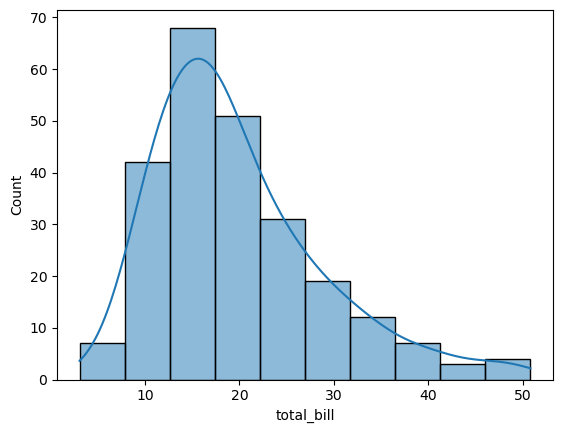

In [65]:
sns.histplot(df["total_bill"],bins=10,kde=True)

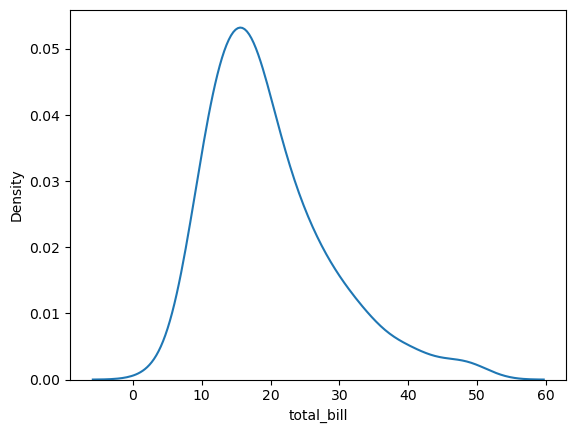

In [69]:
sns.kdeplot(df["total_bill"])
plt.show()

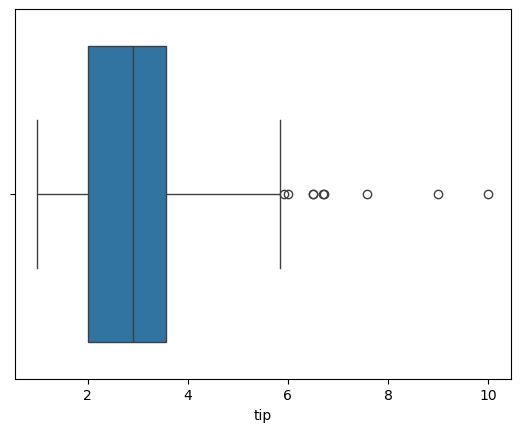

In [71]:
sns.boxplot(x=df["tip"])
plt.show()

<Axes: ylabel='total_bill'>

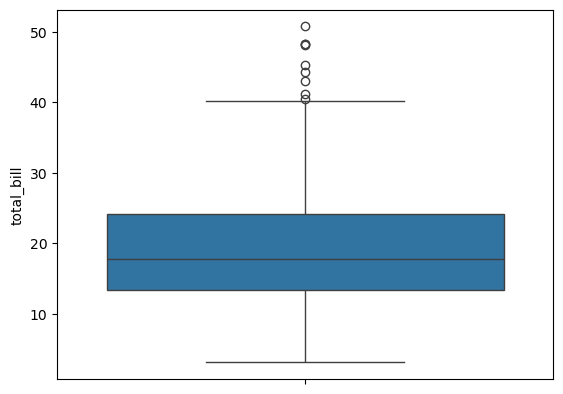

In [73]:
sns.boxplot(y = df["total_bill"])

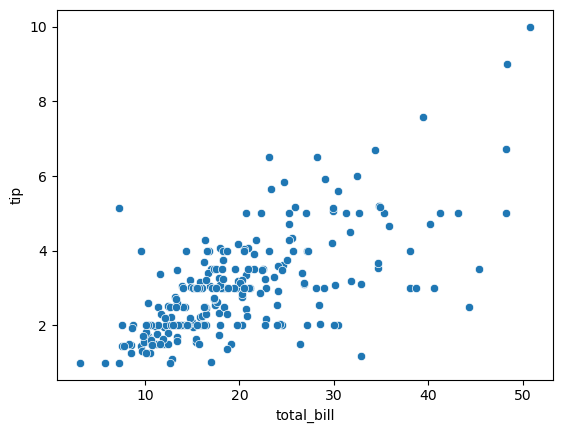

In [83]:
sns.scatterplot(x=df["total_bill"],y=df["tip"])
plt.show()

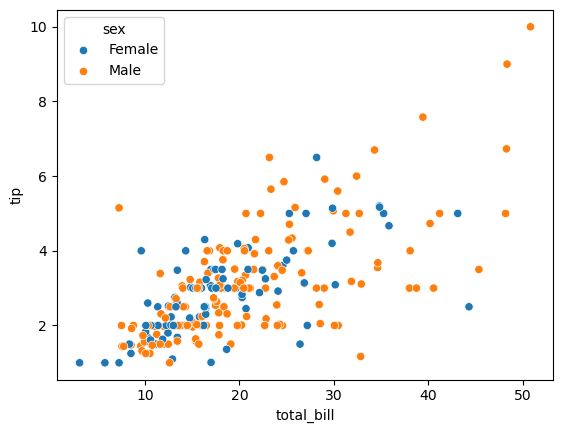

In [95]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["sex"])
plt.show()

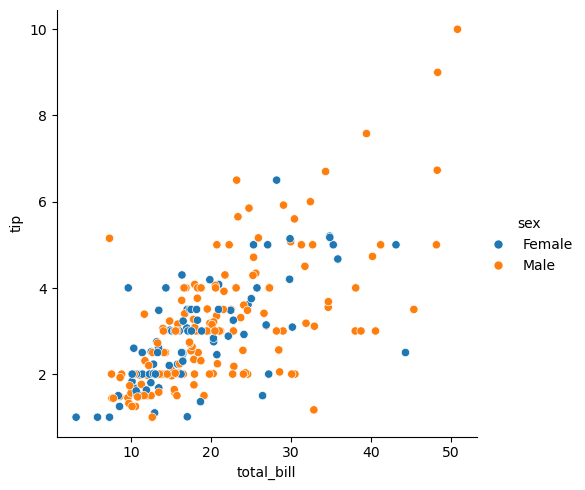

In [97]:
sns.relplot(x=df["total_bill"],y=df["tip"],hue=df["sex"])
plt.show()

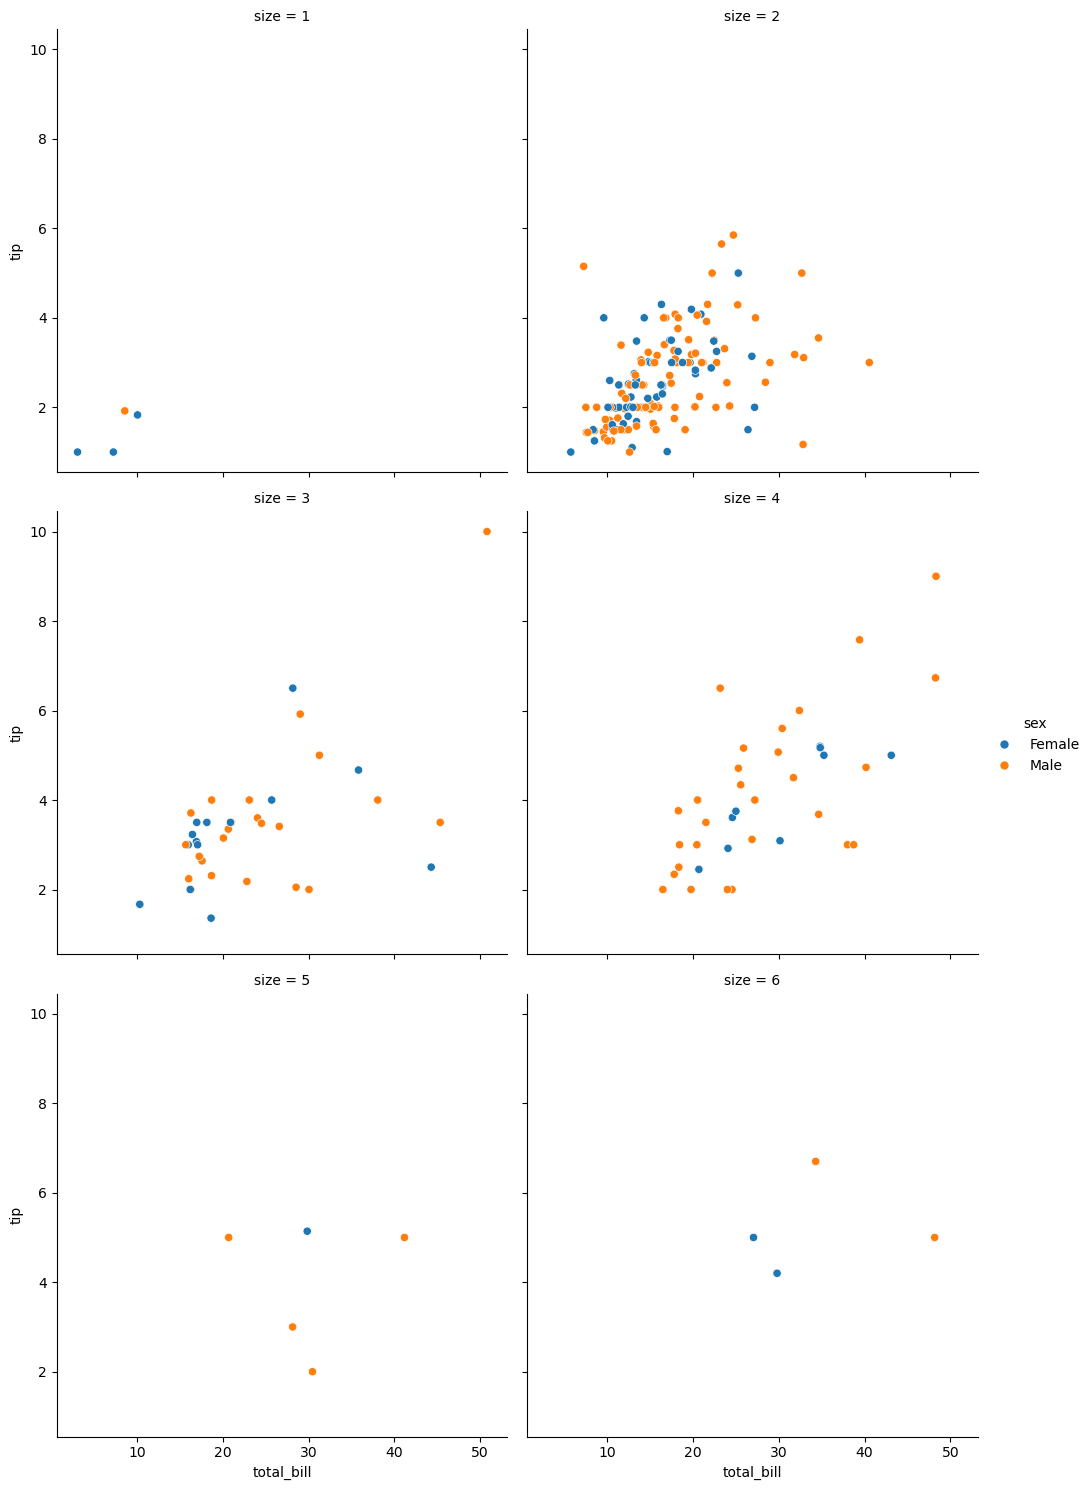

In [103]:
sns.relplot(x=df["total_bill"],y=df["tip"],col=df["size"],col_wrap=2,hue=df["sex"])
plt.show()

In [121]:
df["sno"] = pd.DataFrame(np.arange(1,245))
df

,total_bill,tip,sex,smoker,day,time,size,sno
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,240
240,27.18,2.00,Female,Yes,Sat,Dinner,2,241
241,22.67,2.00,Male,Yes,Sat,Dinner,2,242
242,17.82,1.75,Male,No,Sat,Dinner,2,243


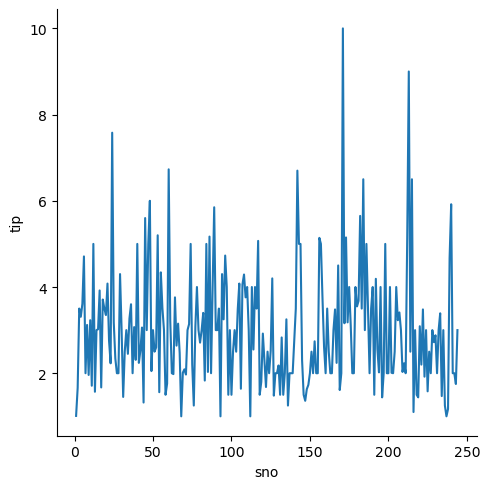

In [123]:
sns.relplot(x = "sno",y="tip",data=df,kind="line")
plt.show()

In [125]:
df.drop("sno",axis=1,inplace=True)

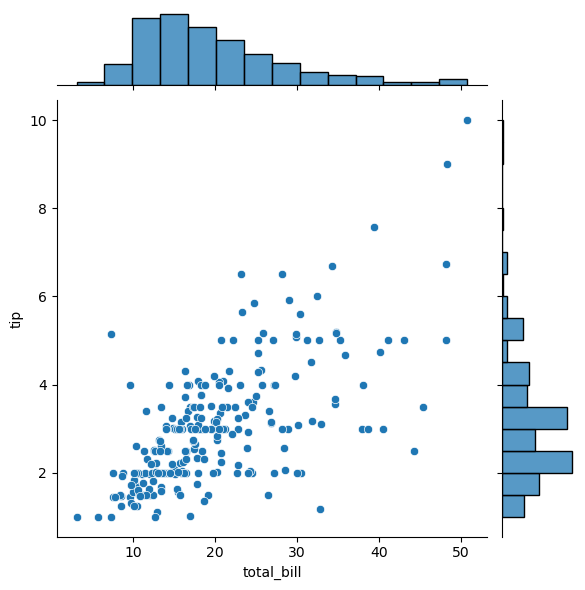

In [129]:
sns.jointplot(x="total_bill",y="tip",data=df)
plt.show()

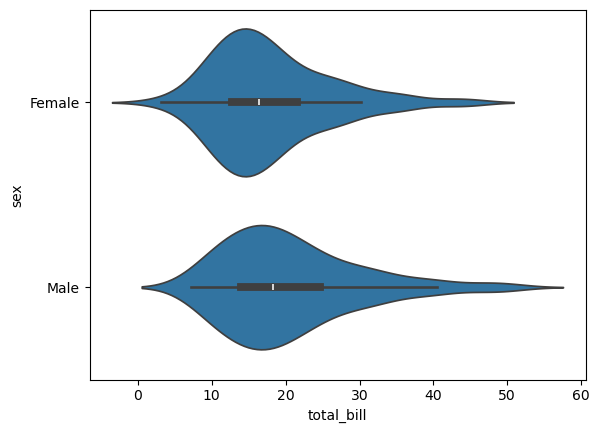

In [133]:
sns.violinplot(x="total_bill",y="sex",data=df)
plt.show()

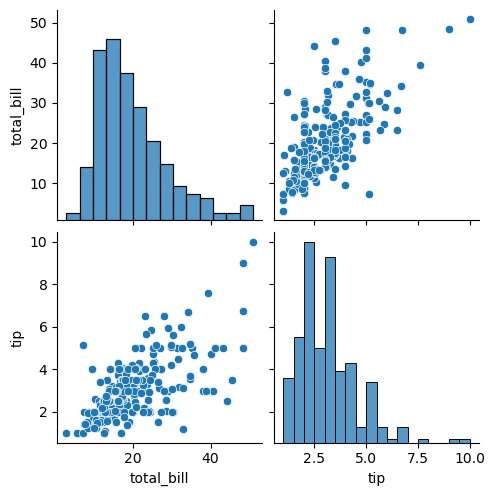

In [135]:
sns.pairplot(df,vars=continuous)
plt.show()

In [137]:
c_m = df[continuous].corr()
c_m

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


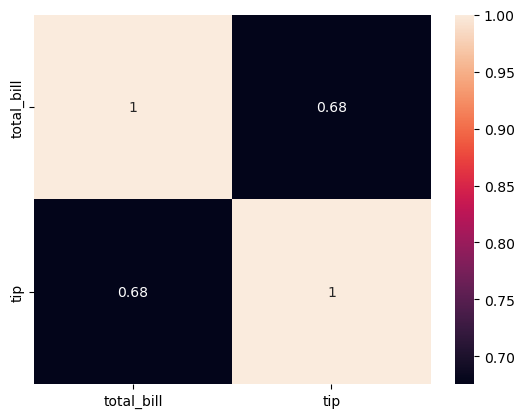

In [139]:
sns.heatmap(c_m,annot=True)
plt.show()

In [141]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [143]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

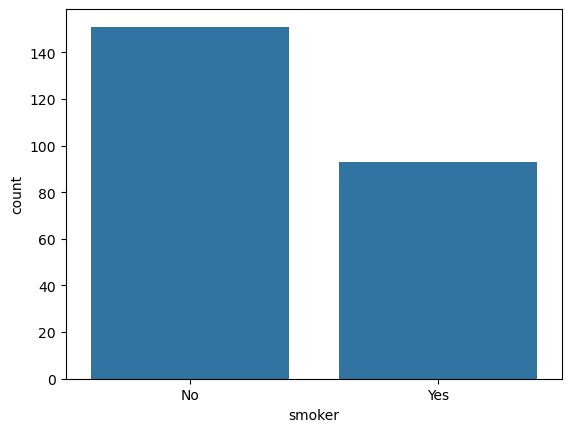

In [147]:
sns.countplot(x="smoker",data=df)
plt.show()

<Axes: xlabel='count', ylabel='smoker'>

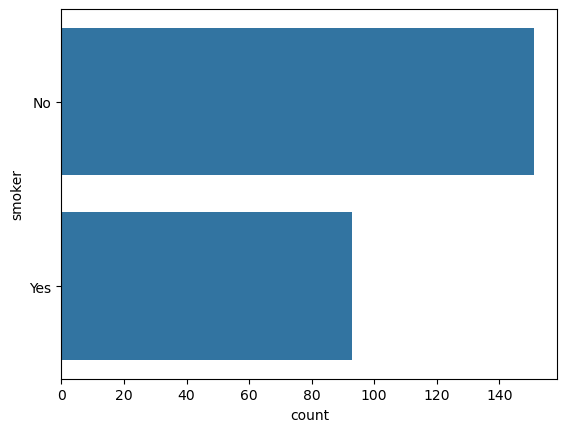

In [149]:
sns.countplot(y=df["smoker"])

In [151]:
df.groupby("sex")["total_bill"].mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

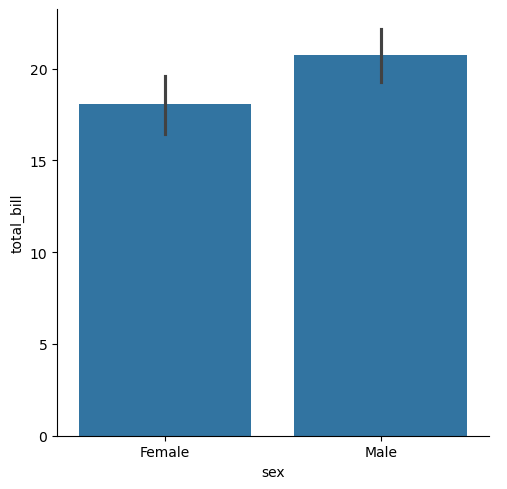

In [159]:
sns.catplot(x="sex",y="total_bill",data=df,kind="bar")
plt.show()

In [161]:
df.groupby("smoker")["total_bill"].mean()

smoker
No     19.188278
Yes    20.756344
Name: total_bill, dtype: float64

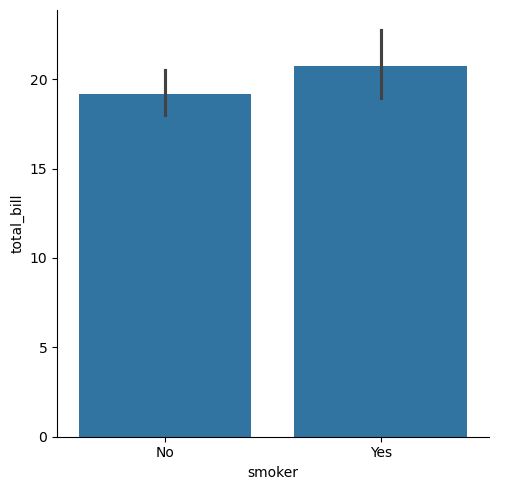

In [163]:
sns.catplot(x="smoker",y="total_bill",data=df,kind="bar")
plt.show()

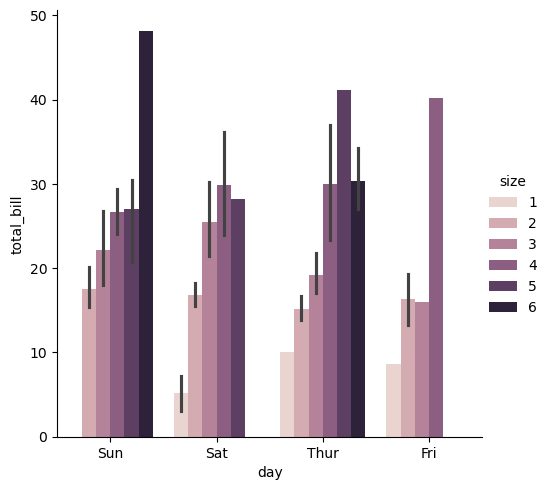

In [165]:
sns.catplot(x="day",y="total_bill",data=df,hue="size",kind="bar")
plt.show()

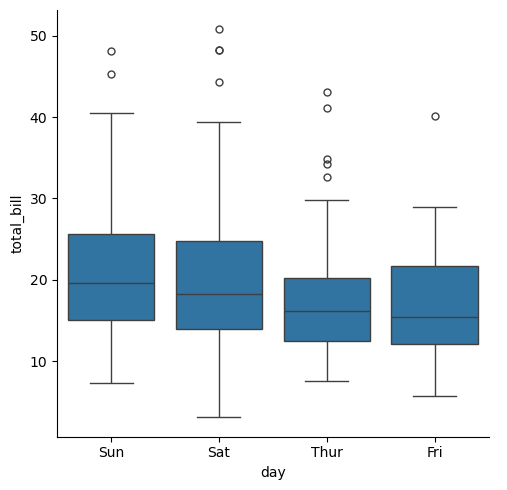

In [167]:
sns.catplot(x="day",y="total_bill",data=df,kind="box")
plt.show()

In [169]:
df.groupby("time")["total_bill"].sum()

time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64

In [171]:
df.groupby("time")["total_bill"].mean()

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

In [173]:
pd.crosstab(df["time"],df["sex"],margins=True)

sex,Female,Male,All
time,,,
Dinner,52,124,176
Lunch,35,33,68
All,87,157,244


In [175]:
pd.crosstab(df["day"],df["time"],margins=True)

time,Dinner,Lunch,All
day,,,
Fri,12,7,19
Sat,87,0,87
Sun,76,0,76
Thur,1,61,62
All,176,68,244
